# Introduction to the sentiment analysis of ***The Umbrella Academy Series***

Organizations and companies use Sentiment Analysis to identify the emotions that customers have towards their products or services, mainly by analysing text data.

In our case study;
- We scraped data from YouTube and Reddit.
- We then preprocessed the text data using NLP techniques.

We are now in the third step, which involves applying Sentiment Analysis to the comments from each season of The Umbrella Academy. This will help us compare and gain insights into how the audience liked the series.

To achieve a clearer objective, we will:

1. Apply Sentiment Analysis to each individual season dataset.
2. Combine the datasets and apply Sentiment Analysis to get an overview of the sentiment overall.

We will utilise lexicon-based approaches to classify our corpus into sentiments because we have unlabeled data.

### Sentiment Analysis Using Text Blob

In [ ]:
# import necessary libraries
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# import the datasets
s1_df = pd.read_csv('/content/drive/MyDrive/Umbrella Academy/Data/season1_clean.csv')
s2_df = pd.read_csv('/content/drive/MyDrive/Umbrella Academy/Data/season2_clean.csv')
s3_df = pd.read_csv('/content/drive/MyDrive/Umbrella Academy/Data/season3_clean.csv')

#### Season 1: Using TextBlob

Creating a function to implement the TextBlob Analysis:

`getPolarity(text)`: calculates the polarity of the input text using TextBlob. Polarity measures the sentiment of the text, ranging from -1 (most negative) to 1 (most positive).

`getAnalysis(score)`: This inner function takes a polarity score as input and assigns a sentiment label ("Negative," "Neutral," or "Positive") based on the threshold set for positivity. If the score is less than 0, it's labeled as "Negative"; if it's equal to 0, it's labeled as "Neutral"; otherwise, it's labeled as "Positive."

In [ ]:
#Define a function that calculates subjectivity, polarity and give it a score based on the threshold you want to set.
def sentiment_analysis(comment):
    # Create a function to get the polarity
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity

    # Create two new columns Polarity
    comment["TextBlob_Polarity"] = comment["body"].apply(getPolarity)

    def getAnalysis(score):
        if score < 0:
            return "Negative"
        elif score == 0:
            return "Neutral"
        else:
            return "Positive"

    comment["TextBlob_Analysis"] = comment["TextBlob_Polarity"].apply(getAnalysis)

    return comment

In [ ]:
# Apply the sentiment_analysis function to season 1 data
sentiment_s1_df= sentiment_analysis(s1_df)

# display dataframe
sentiment_s1_df

,body,new_word_count,TextBlob_Polarity,TextBlob_Analysis
0,loved god dang really infuriating luther treat...,12,0.050000,Positive
1,aidan gallagher really deserves prop pretty bi...,10,0.150000,Positive
2,oh boy say fuck peabody guy,6,-0.400000,Negative
3,watched episode blown away amazing show probab...,37,0.316136,Positive
4,literally finished series really liked never r...,129,0.312069,Positive
...,...,...,...,...
1064,soon quoti think alone nowquot tiffany sold,7,0.000000,Neutral
1065,anyone else think girl play violin one end world,9,0.000000,Neutral
1066,im actually looking forward seeing,5,0.000000,Neutral
1067,finished reading first vol im pretty stocked w...,13,0.200000,Positive


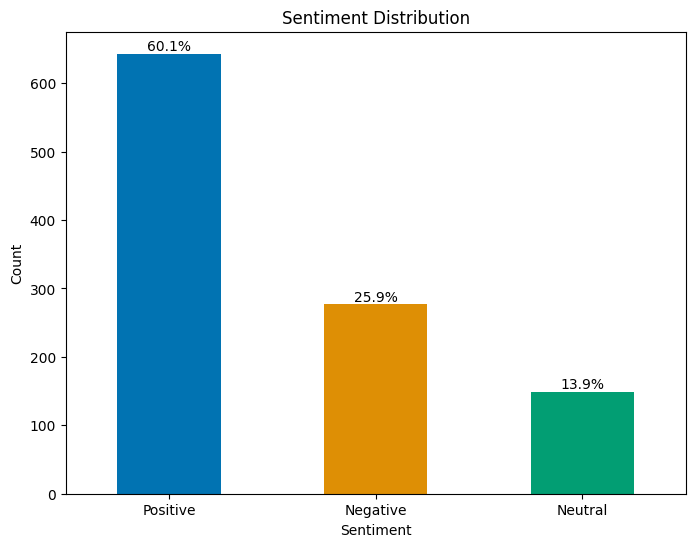

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = sentiment_s1_df['TextBlob_Analysis'].value_counts()

colors = sns.color_palette('colorblind', len(sentiment_counts))
# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Calculate and annotate the percentages
total_count = len(sentiment_s1_df)
for i, count in enumerate(sentiment_counts):
    percentage = (count / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (i, count), ha='center', va='bottom')

# Show the plot
plt.show()

#### Season 2: Using TextBlob

In [ ]:
# Apply the sentiment_analysis function to season 2 data
sentiment_s2_df= sentiment_analysis(s2_df)

# display dataframe
sentiment_s2_df

,body,new_word_count,TextBlob_Polarity,TextBlob_Analysis
0,know going lie fence several time season seaso...,19,0.400000,Positive
1,ofcourse diego perfect superhero landing :face...,6,1.000000,Positive
2,handler shot everyone :eye::mouth::eye: :grinn...,5,0.000000,Neutral
3,whole family going road trip feelgood scene,7,0.200000,Positive
4,anyone else raise lower volume constantly seem...,14,-0.100000,Negative
...,...,...,...,...
1541,honestly enjoyed season much got lot ben,7,0.350000,Positive
1542,wish aj bigger part season,5,0.000000,Neutral
1543,loved season much loved different vanya rememb...,8,0.466667,Positive
1544,klaus allisons friendship meant much heartbrok...,10,0.168182,Positive


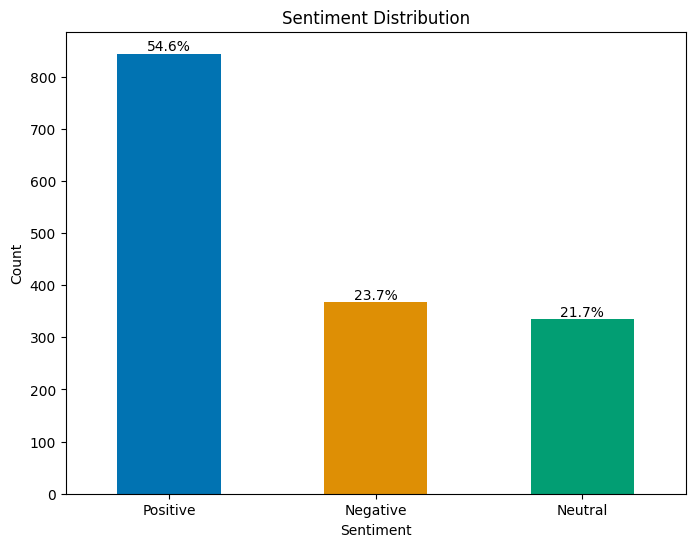

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = sentiment_s2_df['TextBlob_Analysis'].value_counts()

colors = sns.color_palette('colorblind', len(sentiment_counts))
# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Calculate and annotate the percentages
total_count = len(sentiment_s2_df)
for i, count in enumerate(sentiment_counts):
    percentage = (count / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (i, count), ha='center', va='bottom')

# Show the plot
plt.show()

#### Season 3: Using TextBlob

In [ ]:
# Apply the sentiment_analysis function to season 2 data
sentiment_s3_df= sentiment_analysis(s3_df)

# display dataframe
sentiment_s3_df

,body,new_word_count,TextBlob_Polarity,TextBlob_Analysis
0,haha love klaus could show lmao,6,0.433333,Positive
1,think agree biggest travesty hotel california ...,8,0.000000,Neutral
2,luther see new hot sister :hot_face:,6,0.193182,Positive
3,lady power hallucinogenic gleeking lmao,5,0.600000,Positive
4,thought season much lower budget green screen ...,29,-0.290000,Negative
...,...,...,...,...
1908,amazing video spoiler man :fire::fire:,5,0.600000,Positive
1909,heard rumor mephisto reginald lmao,5,0.600000,Positive
1910,season really great put topping pizza,6,0.800000,Positive
1911,liked seasonbrbrlittle bit le stake since anno...,13,0.350000,Positive


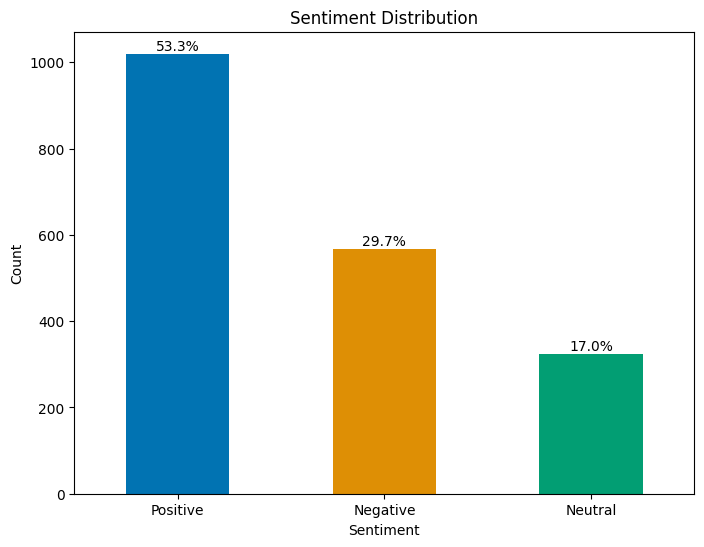

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = sentiment_s3_df['TextBlob_Analysis'].value_counts()

colors = sns.color_palette('colorblind', len(sentiment_counts))
# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Calculate and annotate the percentages
total_count = len(sentiment_s3_df)
for i, count in enumerate(sentiment_counts):
    percentage = (count / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (i, count), ha='center', va='bottom')

# Show the plot
plt.show()

**TextBlob Sentiment Anlaysis Observations**

According to the TextBlob Analysis, Season 1 had the most positive sentiment at 60.1% of the reviews, followed by a slight drop in sentiment for Season 2 at 54.6% and Season 3 at 53.3%. This decrease in positive sentiment reviews was anticipated, especially for Season 3. It's worth noting that Season 3 received more negative feedback, accounting for 29.7% of the reviews being negative. This might be due to the character "Allison" not being well-received by the audience, as well as some disappointment with the graphics in Season 3, as per audience feedback.

## Sentiment Analysis Using VADER

#### Season 1: Using VADER

In [ ]:
# Creating function for VADER

def vader_sentiment_analysis(df):
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Create a function to get the sentiment polarity score
    def get_sentiment_score(text):
        sentiment = sia.polarity_scores(text)
        return sentiment['compound']  # We'll use the compound score

    # Create a new column 'VADER_Polarity' to store sentiment scores
    df['VADER_Polarity'] = df['body'].apply(get_sentiment_score)

    # Define a function to label the sentiment
    def get_sentiment_label(score):
        if score > 0:
            return 'Positive'
        elif score < 0:
            return 'Negative'
        else:
            return 'Neutral'

    # Create a new column 'VADER_Analysis' to store sentiment labels
    df['VADER_Analysis'] = df['VADER_Polarity'].apply(get_sentiment_label)

    return df

In [ ]:
# Apply the VADER sentiment analysis
vader_df_s1 = vader_sentiment_analysis(s1_df)

vader_df_s1



,body,new_word_count,TextBlob_Polarity,TextBlob_Analysis,VADER_Polarity,VADER_Analysis
0,loved god dang really infuriating luther treat...,12,0.050000,Positive,0.6452,Positive
1,aidan gallagher really deserves prop pretty bi...,10,0.150000,Positive,0.5367,Positive
2,oh boy say fuck peabody guy,6,-0.400000,Negative,-0.5423,Negative
3,watched episode blown away amazing show probab...,37,0.316136,Positive,0.9132,Positive
4,literally finished series really liked never r...,129,0.312069,Positive,0.9954,Positive
...,...,...,...,...,...,...
1064,soon quoti think alone nowquot tiffany sold,7,0.000000,Neutral,-0.2500,Negative
1065,anyone else think girl play violin one end world,9,0.000000,Neutral,0.3400,Positive
1066,im actually looking forward seeing,5,0.000000,Neutral,0.0000,Neutral
1067,finished reading first vol im pretty stocked w...,13,0.200000,Positive,0.4939,Positive


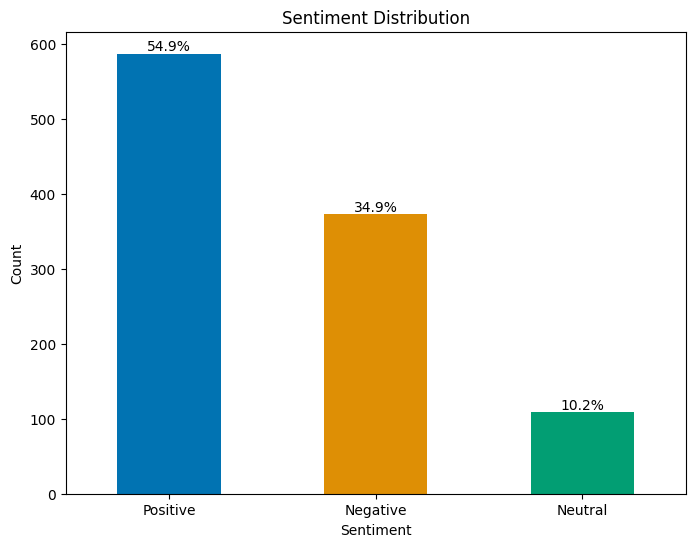

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = vader_df_s1['VADER_Analysis'].value_counts()

colors = sns.color_palette('colorblind', len(sentiment_counts))
# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Calculate and annotate the percentages
total_count = len(vader_df_s1)
for i, count in enumerate(sentiment_counts):
    percentage = (count / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (i, count), ha='center', va='bottom')

# Show the plot
plt.show()

#### Season 2: Using VADER

In [ ]:
# Apply the VADER sentiment analysis function
vader_df_s2 = vader_sentiment_analysis(s2_df)

vader_df_s2


,body,new_word_count,TextBlob_Polarity,TextBlob_Analysis,VADER_Polarity,VADER_Analysis
0,know going lie fence several time season seaso...,19,0.400000,Positive,0.8816,Positive
1,ofcourse diego perfect superhero landing :face...,6,1.000000,Positive,0.5719,Positive
2,handler shot everyone :eye::mouth::eye: :grinn...,5,0.000000,Neutral,0.0000,Neutral
3,whole family going road trip feelgood scene,7,0.200000,Positive,0.0000,Neutral
4,anyone else raise lower volume constantly seem...,14,-0.100000,Negative,0.4980,Positive
...,...,...,...,...,...,...
1541,honestly enjoyed season much got lot ben,7,0.350000,Positive,0.7430,Positive
1542,wish aj bigger part season,5,0.000000,Neutral,0.4019,Positive
1543,loved season much loved different vanya rememb...,8,0.466667,Positive,0.7184,Positive
1544,klaus allisons friendship meant much heartbrok...,10,0.168182,Positive,-0.3400,Negative


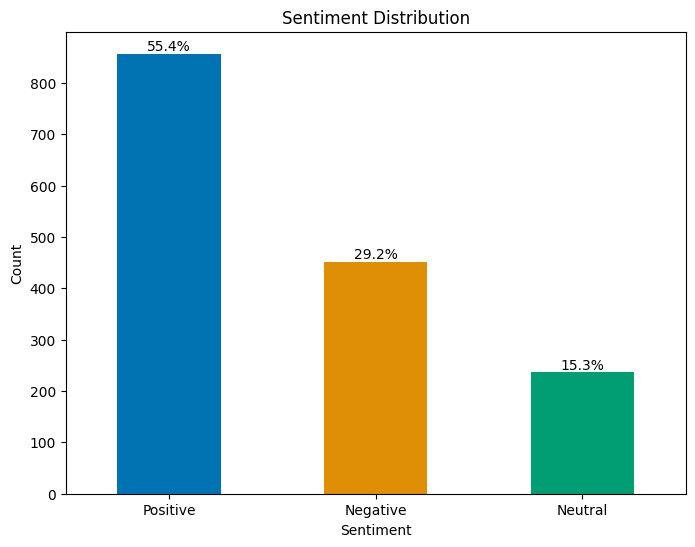

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = vader_df_s2['VADER_Analysis'].value_counts()

colors = sns.color_palette('colorblind', len(sentiment_counts))
# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Calculate and annotate the percentages
total_count = len(vader_df_s2)
for i, count in enumerate(sentiment_counts):
    percentage = (count / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (i, count), ha='center', va='bottom')

# Show the plot
plt.show()

#### Season 3: Using VADER

In [ ]:
# Apply the VADER sentiment analysis function to your DataFrame
vader_df_s3 = vader_sentiment_analysis(s3_df)

vader_df_s3


,body,new_word_count,TextBlob_Polarity,TextBlob_Analysis,VADER_Polarity,VADER_Analysis
0,haha love klaus could show lmao,6,0.433333,Positive,0.9022,Positive
1,think agree biggest travesty hotel california ...,8,0.000000,Neutral,-0.2960,Negative
2,luther see new hot sister :hot_face:,6,0.193182,Positive,0.0000,Neutral
3,lady power hallucinogenic gleeking lmao,5,0.600000,Positive,0.5994,Positive
4,thought season much lower budget green screen ...,29,-0.290000,Negative,-0.6705,Negative
...,...,...,...,...,...,...
1908,amazing video spoiler man :fire::fire:,5,0.600000,Positive,0.5859,Positive
1909,heard rumor mephisto reginald lmao,5,0.600000,Positive,0.5994,Positive
1910,season really great put topping pizza,6,0.800000,Positive,0.6590,Positive
1911,liked seasonbrbrlittle bit le stake since anno...,13,0.350000,Positive,0.2810,Positive


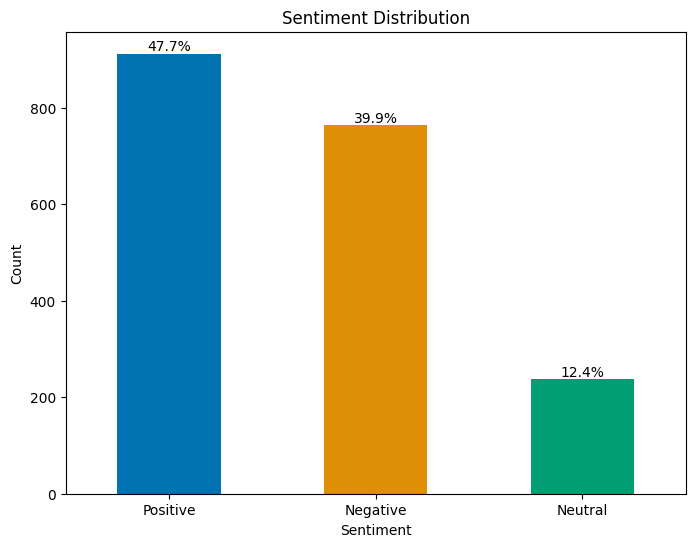

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = vader_df_s3['VADER_Analysis'].value_counts()

colors = sns.color_palette('colorblind', len(sentiment_counts))
# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Calculate and annotate the percentages
total_count = len(vader_df_s3)
for i, count in enumerate(sentiment_counts):
    percentage = (count / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (i, count), ha='center', va='bottom')

# Show the plot
plt.show()